In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
zoo_df = pd.read_csv("Zoo.csv")
zoo_df.head(3)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4


In [4]:
zoo_df.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

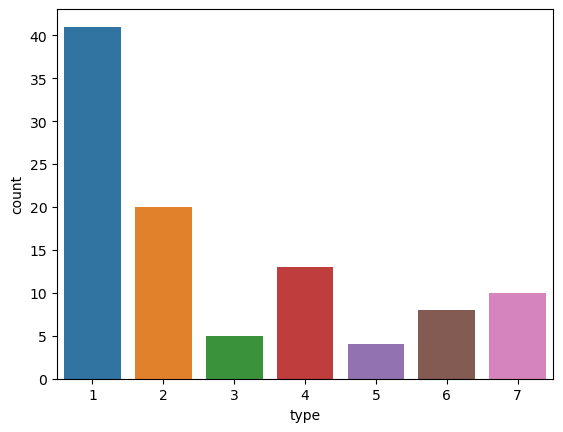

In [5]:
sns.countplot(data=zoo_df,x='type')
plt.show()

In [6]:
zoo_df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [8]:
zoo_df[zoo_df.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


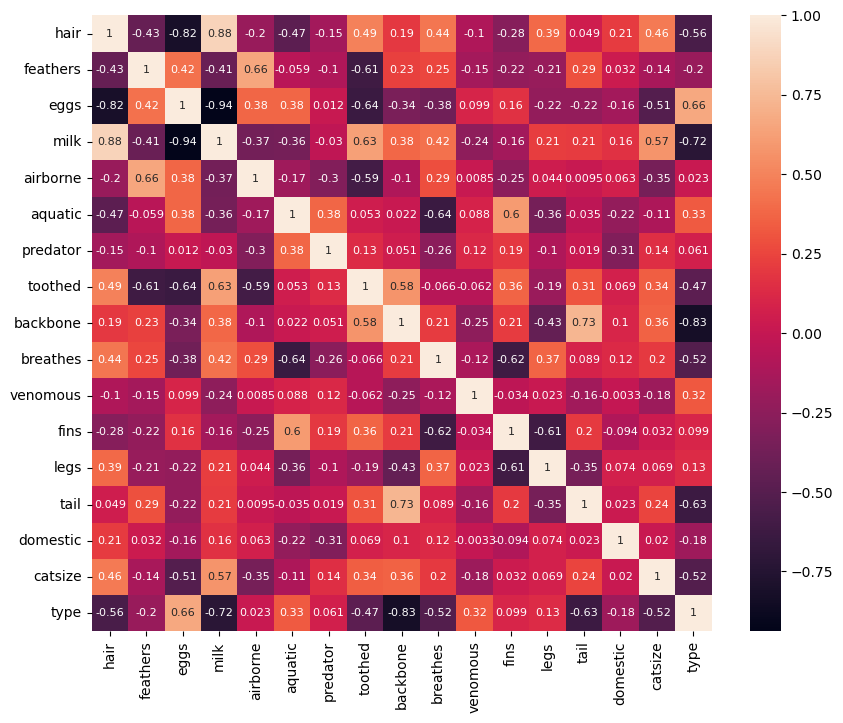

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(zoo_df.corr(),annot=True,annot_kws={"size": 8})
plt.show()

## Even Though features like 'fins', 'preadator' and 'airbone' seem to have low correlation with 'type' we will not drop it during final model preparation :-
+ because they donot seem to have high correlation with any other feature and hence adds some information(no matter how small it may be) to us for classification  

In [10]:
zoo_df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [11]:
X = zoo_df.loc[:,['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']]
Y = zoo_df.loc[:,['type']]

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

## Using Grid search to determine optimal number of neighbours 

In [13]:
n_neighbors = np.array(range(1,30))
param_grid = dict(n_neighbors=n_neighbors)

In [14]:
model = KNeighborsClassifier()
grid = GridSearchCV(model,param_grid = param_grid)
grid.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [15]:
grid.best_score_

0.975

In [16]:
grid.best_params_

{'n_neighbors': 1}

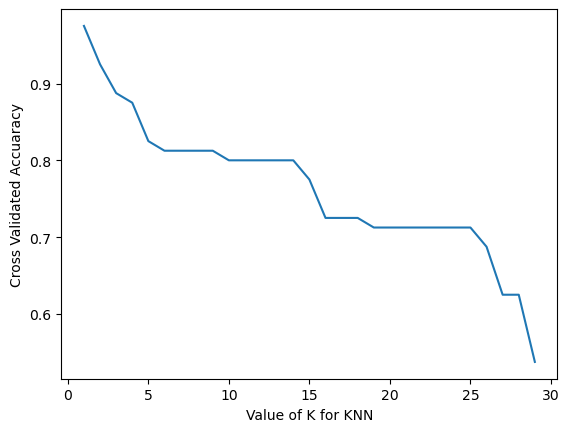

In [17]:
k_range = range(1,30)
k_score = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  score = cross_val_score(knn,X_train,Y_train,cv=5)
  k_score.append(score.mean())
plt.plot(k_range,k_score)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross Validated Accuaracy")
plt.show()

## For training data the accuracy of the classification turns out to be 100 % let's now check it for testing data
- Further the optimum number of neighbors turns out to be 1.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [19]:
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
score = cross_val_score(model,X_test, Y_test)
print(f"The Accuracy for the Testing data for the model is {round(score.mean(),4)*100} %")

The Accuracy for the Testing data for the model is 77.0 %


## Let's plot the confusion matrix for the data 

In [21]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
cm

array([[8, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 2]], dtype=int64)

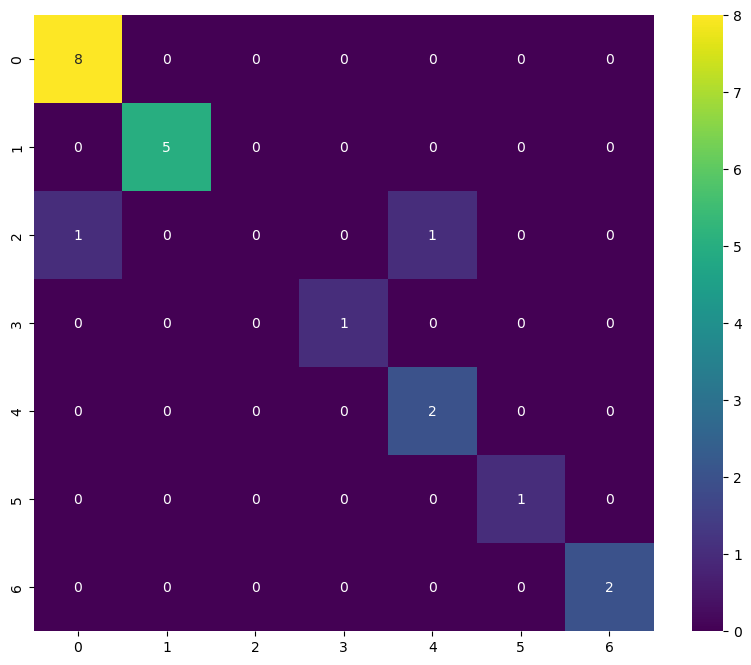

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,cmap='viridis')
plt.show()